In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# import tensorflow as tf
from tensorflow.keras.models import load_model
from skimage import metrics

In [2]:
path = os.path.abspath("..")

X_val = np.load(path+"/train_test_data/X_val.npy")
y_val = np.load (path+"/train_test_data/y_val.npy")

X_val.shape, y_val.shape

((137, 17, 64, 64, 3), (137, 17, 64, 64, 1))

In [3]:
model = load_model(path+"/lstm_model_2.h5")
history = np.load(path+"/history_2.npy", allow_pickle=True).item()

In [4]:
def scale_array(arr):
    arr_min = np.min(arr)  ## Flattens the array and finds the min value inside it
    arr_max = np.max(arr)  ## Flattens the array and finds the max value inside it
    scaled_array = (arr - arr_min) / (arr_max - arr_min) * 255
    scaled_array = scaled_array.astype(np.uint8)
    
    return scaled_array

In [5]:
GT_array = y_val
a, b, c, d, e = y_val.shape[0], y_val.shape[1], y_val.shape[2], y_val.shape[3], y_val.shape[4] 
PD_array = np.zeros((a, b, c, d, e))   ## Predicted arrays

for i in range(X_val.shape[0]):
    frames = X_val[i]   ## taking 1 validation video sample at one time
    PD_array[i] = model.predict(np.expand_dims(frames, axis=0), verbose=0, workers=10, use_multiprocessing=True)

GT_scaled = scale_array(y_val)
PD_scaled = scale_array(PD_array)

GT_array.shape, PD_array.shape

((137, 17, 64, 64, 1), (137, 17, 64, 64, 1))

In [6]:
X_g1 = np.delete(np.concatenate((X_val, PD_array), axis=-1), 0, axis=-1)
X_g1 = np.delete(X_g1, -1, axis=1)
y_g1 = np.delete(y_val, 0, axis=1)

a, b, c, d, e = y_g1.shape[0], y_g1.shape[1], y_g1.shape[2], y_g1.shape[3], y_g1.shape[4] 
PD_G1 = np.zeros((a, b, c, d, e))   ## Predicted arrays
for i in range(X_g1.shape[0]):
    frames = X_g1[i]   ## taking 1 validation video sample at one time
    PD_G1[i] = model.predict(np.expand_dims(frames, axis=0), verbose=0, workers=10, use_multiprocessing=True)

y_g1_scaled = scale_array(y_g1)
PD_G1_scaled = scale_array(PD_G1)

y_g1.shape, PD_G1.shape

((137, 16, 64, 64, 1), (137, 16, 64, 64, 1))

In [7]:
X_g2 = np.delete(np.concatenate((X_g1, PD_G1), axis=-1), 0, axis=-1)
X_g2 = np.delete(X_g2, -1, axis=1)
y_g2 = np.delete(y_g1, 0, axis=1)

a, b, c, d, e = y_g2.shape[0], y_g2.shape[1], y_g2.shape[2], y_g2.shape[3], y_g2.shape[4] 
PD_G2 = np.zeros((a, b, c, d, e))   ## Predicted arrays

for i in range(X_g1.shape[0]):
    frames = X_g2[i]   ## taking 1 validation video sample at one time
    PD_G2[i] = model.predict(np.expand_dims(frames, axis=0), verbose=0, workers=10, use_multiprocessing=True)

y_g2_scaled = scale_array(y_g2)
PD_G2_scaled = scale_array(PD_G2)

y_g2.shape, PD_G2.shape

((137, 15, 64, 64, 1), (137, 15, 64, 64, 1))

In [8]:
X_g3 = np.delete(np.concatenate((X_g2, PD_G2), axis=-1), 0, axis=-1)
X_g3 = np.delete(X_g3, -1, axis=1)
y_g3 = np.delete(y_g2, 0, axis=1)

a, b, c, d, e = y_g3.shape[0], y_g3.shape[1], y_g3.shape[2], y_g3.shape[3], y_g3.shape[4] 
PD_G3 = np.zeros((a, b, c, d, e))   ## Predicted arrays

for i in range(X_g2.shape[0]):
    frames = X_g3[i]   ## taking 1 validation video sample at one time
    PD_G3[i] = model.predict(np.expand_dims(frames, axis=0), verbose=0, workers=10, use_multiprocessing=True)

y_g3_scaled = scale_array(y_g3)
PD_G3_scaled = scale_array(PD_G3)

y_g3.shape, PD_G3.shape

((137, 14, 64, 64, 1), (137, 14, 64, 64, 1))

## Blobs

In [9]:
from sklearn.model_selection import train_test_split
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [11]:
GT_G0_sam, _, PD_G0_sam, _ = train_test_split(GT_array, PD_array, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G0_sam_scaled, PD_G0_sam_scaled = scale_array(GT_G0_sam), scale_array(PD_G0_sam)

GT_G1_sam, _, PD_G1_sam, _ = train_test_split(y_g1, PD_G1, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G1_sam_scaled, PD_G1_sam_scaled = scale_array(GT_G1_sam), scale_array(PD_G1_sam)

GT_G2_sam, _, PD_G2_sam, _ = train_test_split(y_g2, PD_G2, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G2_sam_scaled, PD_G2_sam_scaled = scale_array(GT_G2_sam), scale_array(PD_G2_sam)

GT_G3_sam, _, PD_G3_sam, _ = train_test_split(y_g3, PD_G3, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G3_sam_scaled, PD_G3_sam_scaled = scale_array(GT_G3_sam), scale_array(PD_G3_sam)

In [12]:

LoG_GT_G0, LoG_PD_G0, DoG_GT_G0, DoG_PD_G0, ratio_LoG_G0, ratio_DoG_G0 = [], [], [], [], [], []
LoG_GT_G1, LoG_PD_G1, DoG_GT_G1, DoG_PD_G1, ratio_LoG_G1, ratio_DoG_G1 = [], [], [], [], [], []
LoG_GT_G2, LoG_PD_G2, DoG_GT_G2, DoG_PD_G2, ratio_LoG_G2, ratio_DoG_G2 = [], [], [], [], [], []
LoG_GT_G3, LoG_PD_G3, DoG_GT_G3, DoG_PD_G3, ratio_LoG_G3, ratio_DoG_G3 = [], [], [], [], [], []


for vs in range(GT_G0_sam_scaled.shape[0]):
    for f in range(GT_G0_sam_scaled.shape[1]):
        img_gt_G0 = GT_G0_sam_scaled[vs, f,:,:,0]
        img_pd_G0 = PD_G0_sam_scaled[vs, f,:,:,0]
    
        log_gt_G0 = blob_log(img_gt_G0, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G0 = blob_log(img_pd_G0, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G0 = blob_dog(img_gt_G0, max_sigma=30, threshold=.1)
        dog_pd_G0 = blob_dog(img_pd_G0, max_sigma=30, threshold=.1)

        LoG_GT_G0.append(log_gt_G0.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G0.append(log_pd_G0.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G0.append(dog_gt_G0.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G0.append(dog_pd_G0.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G0.append(round(log_pd_G0.shape[0]/log_gt_G0.shape[0] ,2))
        ratio_DoG_G0.append(round(dog_pd_G0.shape[0]/dog_gt_G0.shape[0] ,2))
    
    for f in range(GT_G1_sam_scaled.shape[1]):
        img_gt_G1 = GT_G1_sam_scaled[vs, f,:,:,0]
        img_pd_G1 = PD_G1_sam_scaled[vs, f,:,:,0]
    
        log_gt_G1 = blob_log(img_gt_G1, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G1 = blob_log(img_pd_G1, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G1 = blob_dog(img_gt_G1, max_sigma=30, threshold=.1)
        dog_pd_G1 = blob_dog(img_pd_G1, max_sigma=30, threshold=.1)

        LoG_GT_G1.append(log_gt_G1.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G1.append(log_pd_G1.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G1.append(dog_gt_G1.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G1.append(dog_pd_G1.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G1.append(round(log_pd_G1.shape[0]/log_gt_G1.shape[0] ,2))
        ratio_DoG_G1.append(round(dog_pd_G1.shape[0]/dog_gt_G1.shape[0] ,2))

    for f in range(GT_G2_sam_scaled.shape[1]):
        img_gt_G2 = GT_G2_sam_scaled[vs, f,:,:,0]
        img_pd_G2 = PD_G2_sam_scaled[vs, f,:,:,0]
    
        log_gt_G2 = blob_log(img_gt_G2, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G2 = blob_log(img_pd_G2, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G2 = blob_dog(img_gt_G2, max_sigma=30, threshold=.1)
        dog_pd_G2 = blob_dog(img_pd_G2, max_sigma=30, threshold=.1)

        LoG_GT_G2.append(log_gt_G2.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G2.append(log_pd_G2.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G2.append(dog_gt_G2.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G2.append(dog_pd_G2.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G2.append(round(log_pd_G2.shape[0]/log_gt_G2.shape[0] ,2))
        ratio_DoG_G2.append(round(dog_pd_G2.shape[0]/dog_gt_G2.shape[0] ,2))
        
    for f in range(GT_G3_sam_scaled.shape[1]):
        img_gt_G3 = GT_G3_sam_scaled[vs, f,:,:,0]
        img_pd_G3 = PD_G3_sam_scaled[vs, f,:,:,0]
    
        log_gt_G3 = blob_log(img_gt_G3, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G3 = blob_log(img_pd_G3, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G3 = blob_dog(img_gt_G3, max_sigma=30, threshold=.1)
        dog_pd_G3 = blob_dog(img_pd_G3, max_sigma=30, threshold=.1)

        LoG_GT_G3.append(log_gt_G3.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G3.append(log_pd_G3.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G3.append(dog_gt_G3.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G3.append(dog_pd_G3.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G3.append(round(log_pd_G3.shape[0]/log_gt_G3.shape[0] ,2))
        ratio_DoG_G3.append(round(dog_pd_G3.shape[0]/dog_gt_G3.shape[0] ,2))        
        
mean_G0, std_G0, var_G0 = np.mean(ratio_LoG_G0), np.std(ratio_LoG_G0), np.var(ratio_LoG_G0)
mean_G1, std_G1, var_G1 = np.mean(ratio_LoG_G1), np.std(ratio_LoG_G1), np.var(ratio_LoG_G1)
mean_G2, std_G2, var_G2 = np.mean(ratio_LoG_G2), np.std(ratio_LoG_G2), np.var(ratio_LoG_G2)
mean_G3, std_G3, var_G3 = np.mean(ratio_LoG_G3), np.std(ratio_LoG_G3), np.var(ratio_LoG_G3)

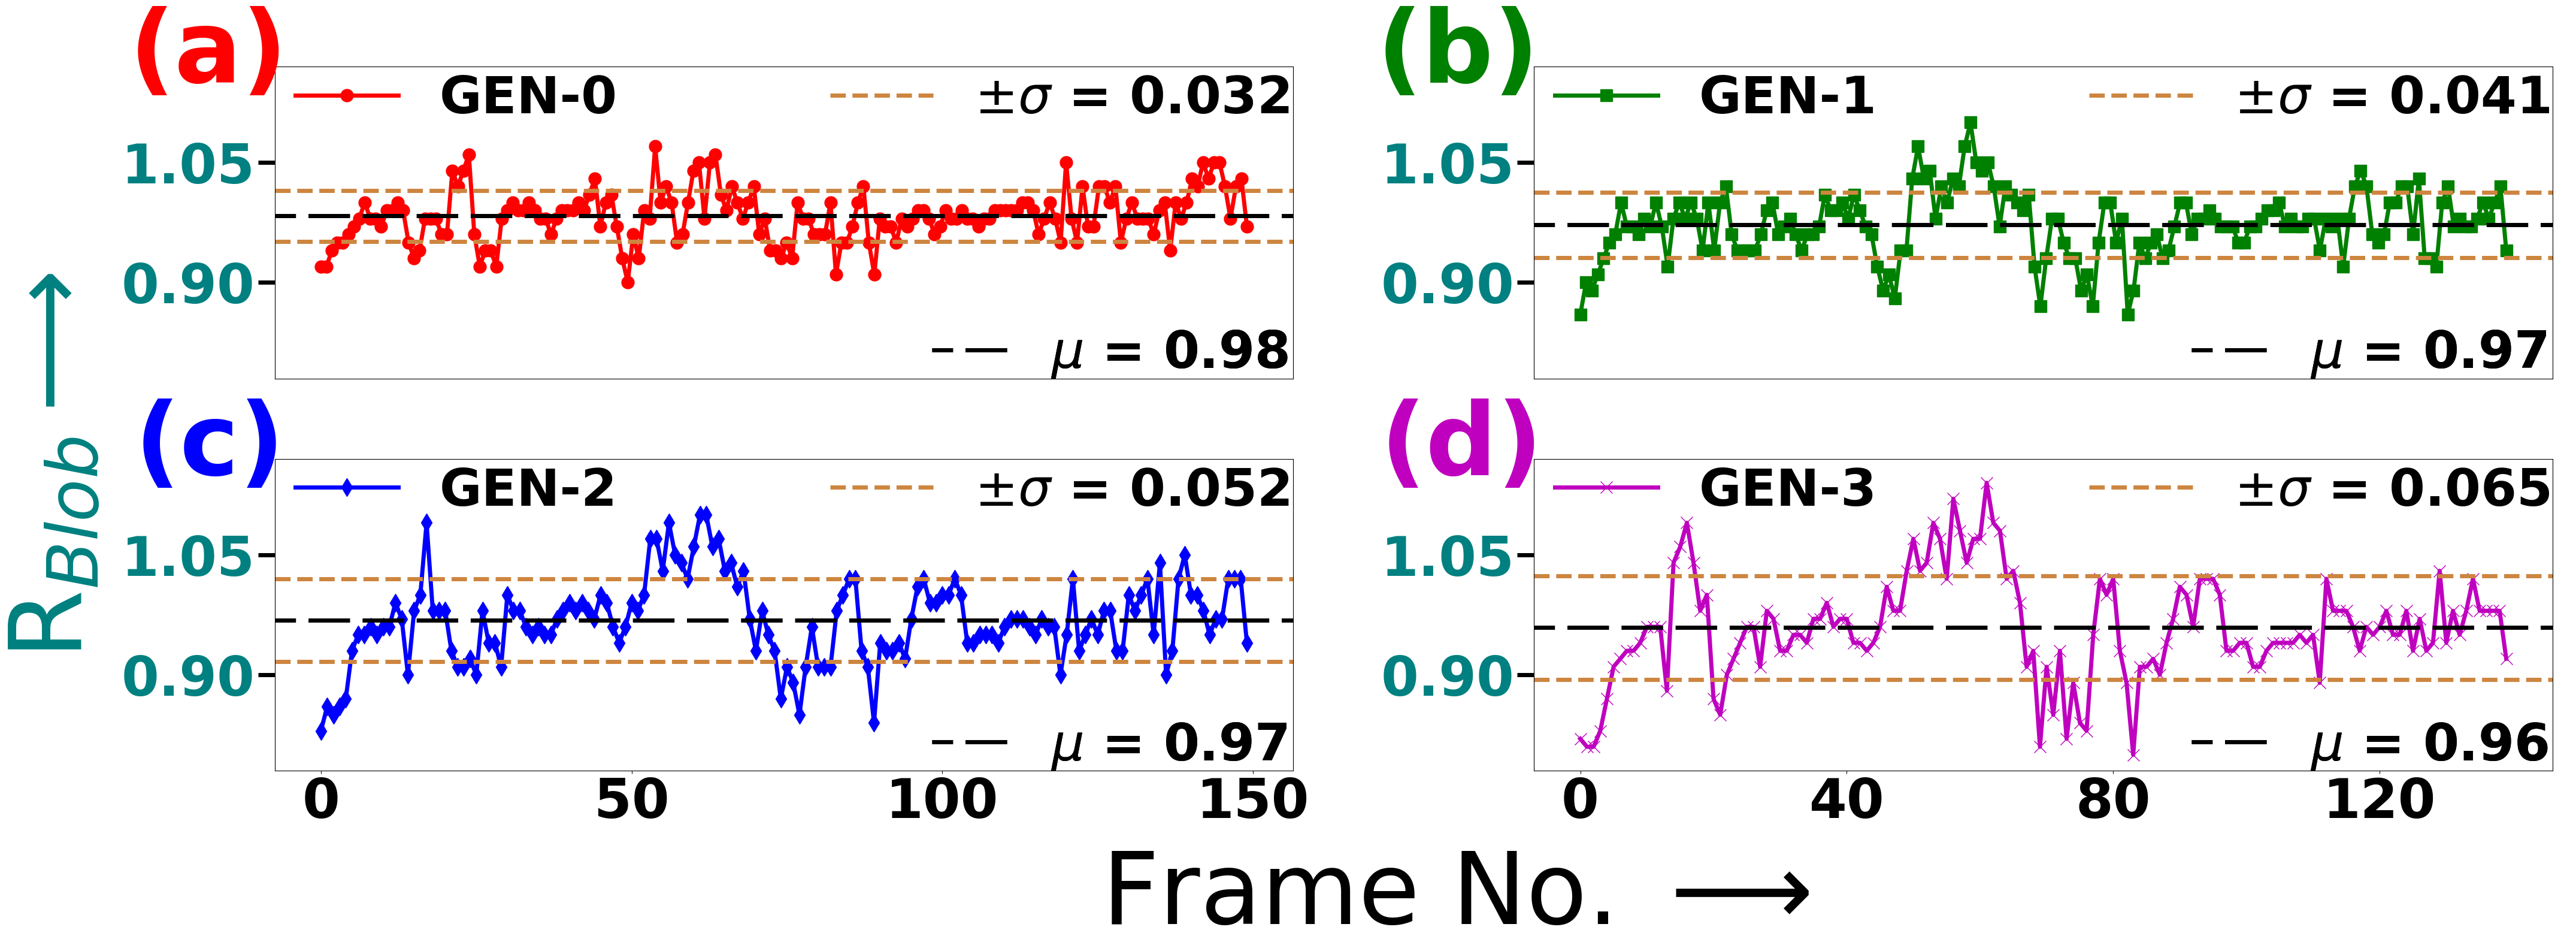

In [212]:
plt.rcParams["figure.figsize"] = (44,16)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, )
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=5)

fig.supxlabel(x=0.55, y =-0.0, t= r"Frame No. $\longrightarrow$", color='black',  fontsize=120)
fig.supylabel(x=-0.0, y =0.5, t=r'R$_{Blob} \longrightarrow$', color='teal', size=120)
    
## ALL LoG calculation Laplacian of Gaussian
# fig.suptitle(r"LoG, $\sigma$f", size=90)



## laplacian is more noise sensetive
x_G0 = range(len(ratio_LoG_G0))

ax1.text(-35,1.15,"(a)", fontsize=120, weight = 'bold', color = 'red')

l0, = ax1.plot(x_G0, ratio_LoG_G0, '-o', color='red', linewidth=5, markersize=15, label='GEN-0')
m0 = ax1.axhline(mean_G0, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G0,2)}', linewidth=5)
s0 =ax1.axhline(mean_G0+std_G0, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G0,3)}', linewidth=5)
ax1.axhline(mean_G0-std_G0, color='peru', linestyle='--', linewidth=5)

lines_0   = ax1.get_lines()
legend0_1 = ax1.legend([lines_0[0]], [lines_0[0].get_label()], loc=(0.0,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
legend0_2 = ax1.legend([lines_0[1]], [lines_0[1].get_label()], loc=(0.625,-0.07), prop={'weight':'bold', 'size':'62',}, handlelength=1.5, frameon=False)
legend0_3 = ax1.legend([lines_0[2]], [lines_0[2].get_label()], loc=(0.525,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
ax1.add_artist(legend0_1)
ax1.add_artist(legend0_2)
ax1.add_artist(legend0_2)


ax1.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5, )
ax1.tick_params(axis='x', labelcolor='black', labelsize=65, bottom=False, top=False, labelbottom=False)
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax1.set_ylim([0.78, 1.17])


x_G1 = range(len(ratio_LoG_G1))

ax2.text(-35,1.15,"(b)", fontsize=120, weight = 'bold', color = 'green')

l1, = ax2.plot(x_G1, ratio_LoG_G1, '-s', color='green', markersize=15, linewidth=5, label='GEN-1')
m1 = ax2.axhline(mean_G1, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G1,2)}', linewidth=5)
s1 = ax2.axhline(mean_G1+std_G1, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G1,3)}', linewidth=5)
ax2.axhline(mean_G1-std_G1, color='peru', linestyle='--', linewidth=5)

lines_1   = ax2.get_lines()
legend1_1 = ax2.legend([lines_1[0]], [lines_1[0].get_label()], loc=(0.0,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
legend1_2 = ax2.legend([lines_1[1]], [lines_1[1].get_label()], loc=(0.625,-0.07), prop={'weight':'bold', 'size':'62',}, handlelength=1.5, frameon=False)
legend1_3 = ax2.legend([lines_1[2]], [lines_1[2].get_label()], loc=(0.525,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
ax2.add_artist(legend1_1)
ax2.add_artist(legend1_2)
ax2.add_artist(legend1_2)

ax2.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5,)
ax2.tick_params(axis='x', labelcolor='black', labelsize=65, bottom=False, top=False, labelbottom=False)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_ylim([0.78, 1.17])


x_G2 = range(len(ratio_LoG_G2))
ax3.text(-30,1.15,"(c)", fontsize=120, weight = 'bold', color = 'blue')
l2, = ax3.plot(x_G2, ratio_LoG_G2, '-d', markersize=15, color='blue', linewidth=5, label='GEN-2',)

m2= ax3.axhline(mean_G2, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G2,2)}', linewidth=5)
s2= ax3.axhline(mean_G2+std_G2, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G2,3)}', linewidth=5)
ax3.axhline(mean_G2-std_G2, color='peru', linestyle='--', linewidth=5)

lines_2   = ax3.get_lines()
legend2_1 = ax3.legend([lines_2[0]], [lines_2[0].get_label()], loc=(0.0,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
legend2_2 = ax3.legend([lines_2[1]], [lines_2[1].get_label()], loc=(0.625,-0.07), prop={'weight':'bold', 'size':'62',}, handlelength=1.5, frameon=False)
legend2_3 = ax3.legend([lines_2[2]], [lines_2[2].get_label()], loc=(0.525,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
ax3.add_artist(legend2_1)
ax3.add_artist(legend2_2)
ax3.add_artist(legend2_2)


ax3.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5)
ax3.tick_params(axis='x', labelcolor='black', labelsize=65)
ax3.xaxis.set_major_locator(plt.MaxNLocator(4))
ax3.yaxis.set_major_locator(plt.MaxNLocator(3))
ax3.set_ylim([0.78, 1.17])


x_G3 = range(len(ratio_LoG_G3))
ax4.text(-30,1.15,"(d)", fontsize=120, weight = 'bold', color = 'm')
l3, = ax4.plot(x_G3, ratio_LoG_G3, '-x', markersize=15, color='m', linewidth=5, label='GEN-3')

m3 = ax4.axhline(mean_G3, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G3,2)}', linewidth=5)
s3 = ax4.axhline(mean_G3+std_G3, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G3,3)}', linewidth=5)
ax4.axhline(mean_G3-std_G3, color='peru', linestyle='--', linewidth=5)

lines_3   = ax4.get_lines()
legend3_1 = ax4.legend([lines_3[0]], [lines_3[0].get_label()], loc=(0.0,0.75), prop={'weight':'bold', 'size':'62',},   frameon=False)
legend3_2 = ax4.legend([lines_3[1]], [lines_3[1].get_label()], loc=(0.625,-0.07), prop={'weight':'bold', 'size':'62',}, handlelength=1.5, frameon=False)
legend3_3 = ax4.legend([lines_3[2]], [lines_3[2].get_label()], loc=(0.525,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
ax4.add_artist(legend3_1)
ax4.add_artist(legend3_2)
ax4.add_artist(legend3_2)

ax4.set_ylim([0.78, 1.17])
ax4.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5)
ax4.tick_params(axis='x', labelcolor='black', labelsize=65)
ax4.xaxis.set_major_locator(plt.MaxNLocator(4))
ax4.yaxis.set_major_locator(plt.MaxNLocator(3))


for label in ax1.get_yticklabels(): label.set_fontweight('bold')
for label in ax2.get_yticklabels(): label.set_fontweight('bold')
for label in ax3.get_yticklabels(): label.set_fontweight('bold')  
for label in ax4.get_yticklabels(): label.set_fontweight('bold')  
for label in ax3.get_xticklabels(): label.set_fontweight('bold')  
for label in ax4.get_xticklabels(): label.set_fontweight('bold')  

plt.tight_layout()

plt.savefig('figures/LoG_Blob_detected.png', transparent=True)
plt.savefig("/home/upadesh/1 Research Project/PhD/0 My Research Papers/0 ConvLSTM/manuscript/figures/LoG_Blob_detected.png", transparent=True)  ## For Manuscript

plt.show()


## counting

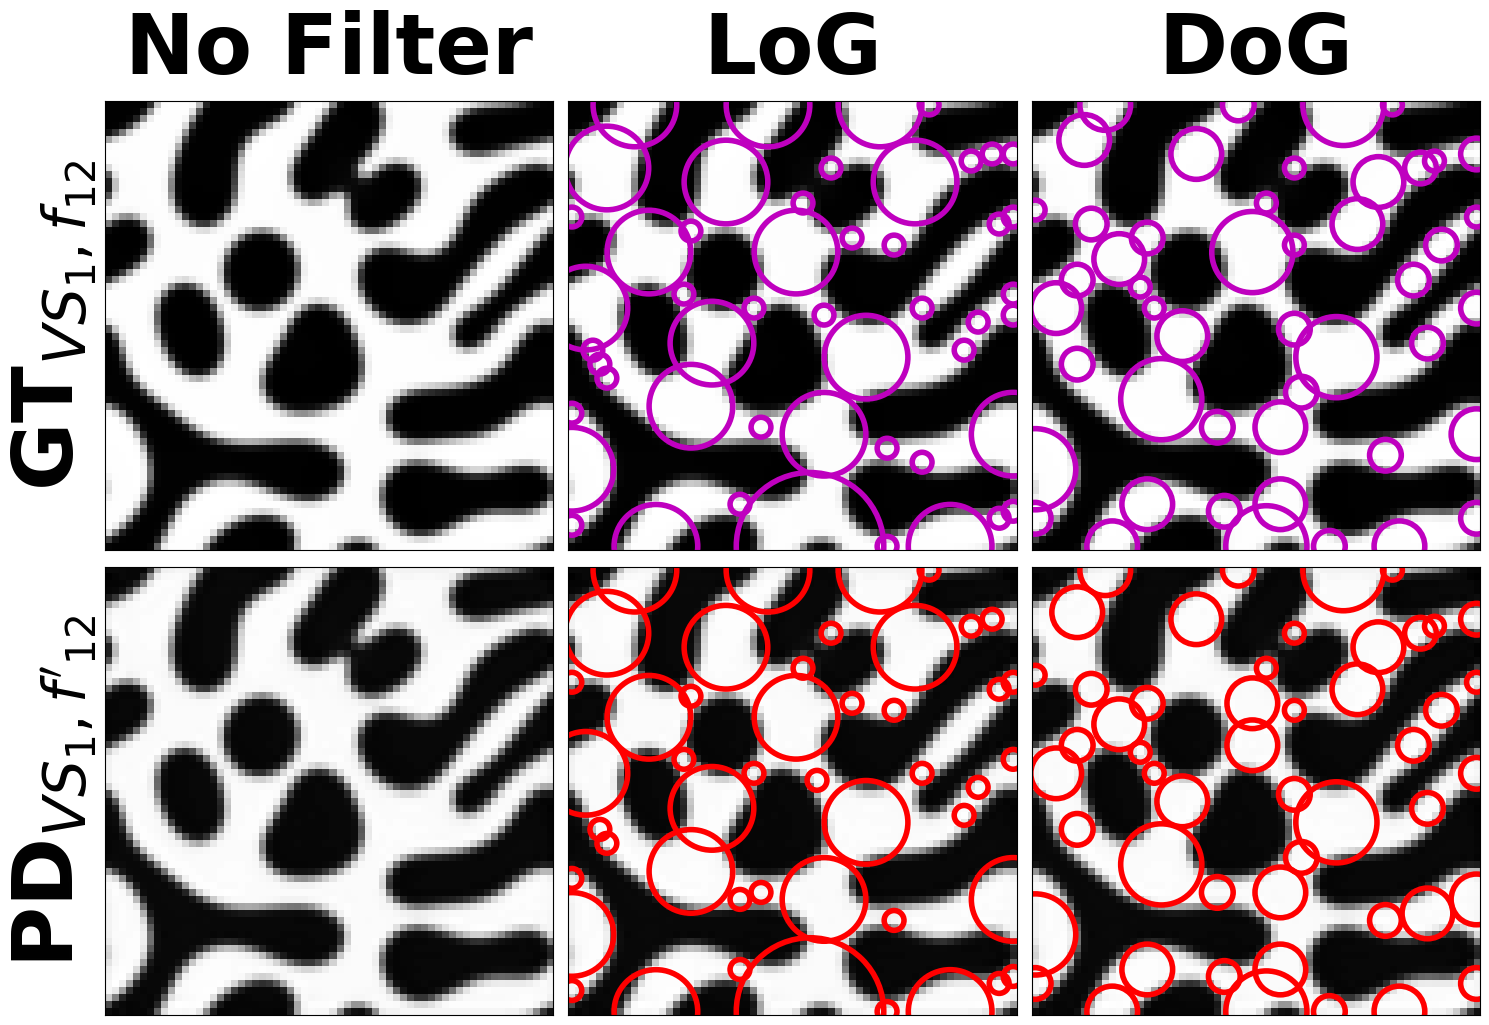

In [357]:
from skimage.feature import blob_dog, blob_log, blob_doh


vs = 1 ## Video sequence no
f = 12  ## Frame 
VS_F = r"$_{VS_1, f_{12}}$"
VS_F_P = r"$_{VS_1, f'_{12}}$"

img_gt = GT_scaled[vs, f,:,:,0]
img_pd = PD_scaled[vs, f,:,:,0]

log_gt = blob_log(img_gt, max_sigma=30, num_sigma=10, threshold=.1)
log_pd = blob_log(img_pd, max_sigma=30, num_sigma=10, threshold=.1)
log_gt[:, 2] = log_gt[:, 2] * sqrt(2)   # # Compute radii in the 3rd column.
log_pd[:, 2] = log_pd[:, 2] * sqrt(2)

dog_gt = blob_dog(img_gt, max_sigma=30, threshold=.1)
dog_pd = blob_dog(img_pd, max_sigma=30, threshold=.1)
dog_gt[:, 2] = dog_gt[:, 2] * sqrt(2)   # # Compute radii in the 3rd column.
dog_pd[:, 2] = dog_pd[:, 2] * sqrt(2)


plt.rcParams["figure.figsize"] = (15,10.5)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, )
Algo = ["LoG", "DoG"]

ax1.imshow(img_gt, 'gray')
ax1.set_ylabel('GT'+VS_F, fontsize=60, weight='bold')
ax1.set_title("No Filter", fontsize=60, weight='bold', pad=20)

ax2.imshow(img_gt, 'gray')
ax2.set_title(Algo[0], fontsize=60, weight='bold', pad=20)

ax3.imshow(img_gt, 'gray')
ax3.set_title(Algo[1], fontsize=60, weight='bold', pad=20)

ax4.imshow(img_pd, 'gray')
ax4.set_ylabel('PD'+VS_F_P, fontsize=60, weight='bold')
ax5.imshow(img_pd, 'gray')
ax6.imshow(img_pd, 'gray')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax5.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

for blob in log_gt:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='m', linewidth=4, linestyle='-', fill=False)
      ax2.add_patch(c)
for blob in dog_gt:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='m', linewidth=4, linestyle='-', fill=False)
      ax3.add_patch(c)
for blob in log_pd:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='r', linewidth=4, linestyle='-', fill=False)
      ax5.add_patch(c)  
for blob in dog_pd:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='r', linewidth=4, linestyle='-', fill=False)
      ax6.add_patch(c)



plt.tight_layout()

plt.savefig("figures/Blobs_counting.png", transparent=True)
plt.savefig("/home/upadesh/1 Research Project/PhD/0 My Research Papers/0 ConvLSTM/manuscript/figures/Blobs_counting.png", transparent=True)  ## For Manuscript

plt.show()